In [1]:
from specialist_data import transformed, X_train, X_test, y_train, y_test

In [2]:
from sklearn.neural_network import MLPClassifier
import pickle

clf = MLPClassifier(
    hidden_layer_sizes=(6,6,5),
    alpha=0.001,
    max_iter=2000,
    solver='sgd',
    verbose=10,
    random_state=42,
    tol=0.000005
)

clf.fit(X_train, y_train)

filename = 'mlp_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

Iteration 1, loss = 0.62769498
Iteration 2, loss = 0.51056717
Iteration 3, loss = 0.40945904
Iteration 4, loss = 0.32220057
Iteration 5, loss = 0.26517180
Iteration 6, loss = 0.23123997
Iteration 7, loss = 0.20875145
Iteration 8, loss = 0.19182144
Iteration 9, loss = 0.17840811
Iteration 10, loss = 0.16759218
Iteration 11, loss = 0.15873032
Iteration 12, loss = 0.15131741
Iteration 13, loss = 0.14509129
Iteration 14, loss = 0.13965009
Iteration 15, loss = 0.13489198
Iteration 16, loss = 0.13071134
Iteration 17, loss = 0.12695924
Iteration 18, loss = 0.12352233
Iteration 19, loss = 0.12035495
Iteration 20, loss = 0.11742228
Iteration 21, loss = 0.11475106
Iteration 22, loss = 0.11235833
Iteration 23, loss = 0.11009219
Iteration 24, loss = 0.10804844
Iteration 25, loss = 0.10614447
Iteration 26, loss = 0.10439686
Iteration 27, loss = 0.10282007
Iteration 28, loss = 0.10142024
Iteration 29, loss = 0.10017483
Iteration 30, loss = 0.09901203
Iteration 31, loss = 0.09798660
Iteration 32, los

0.9780194354465526


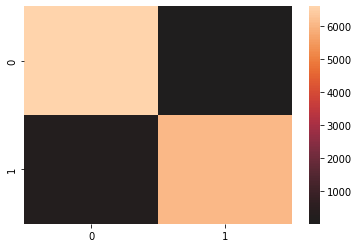

In [3]:
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'mlp_classifier.sav'
model = pickle.load(open(filename, 'rb'))
result = model.score(X_test, y_test)
print(result)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)
plt.show()

In [6]:
from graph_utils import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

results = pd.DataFrame()

for i in range(5):
    r = pd.read_csv(f'../../data/xdpole/specialist/s{i+1}_specialist.csv', index_col='Unnamed: 0')
    if results.empty:
        results = r
    else:
        results = pd.concat([results, r])

good = pd.read_csv(f'../../data/xdpole/specialist/s1000_specialist.csv', index_col='Unnamed: 0')
bad = pd.read_csv(f'../../data/xdpole/specialist/s0_specialist.csv', index_col='Unnamed: 0')

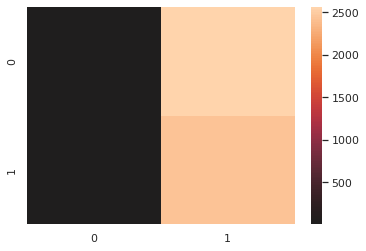

In [5]:
y_results = results.prediction

np.random.shuffle(y_test)
y_test_part = y_test[:len(y_results)]

cm = confusion_matrix(y_test_part, y_results)
sns.heatmap(cm, center=True)
plt.show()

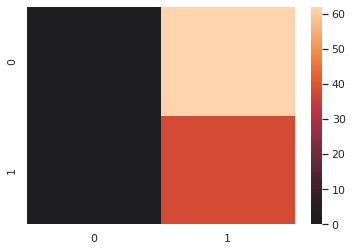

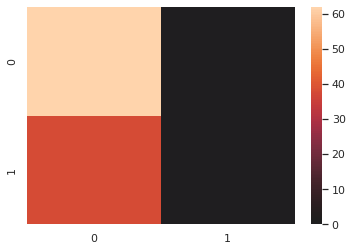

In [8]:
np.random.shuffle(y_test)
y_test_part = y_test[:len(good.prediction)]

cm = confusion_matrix(y_test_part, good.prediction)
sns.heatmap(cm, center=True)
plt.show()

cm = confusion_matrix(y_test_part, bad.prediction)
sns.heatmap(cm, center=True)
plt.show()

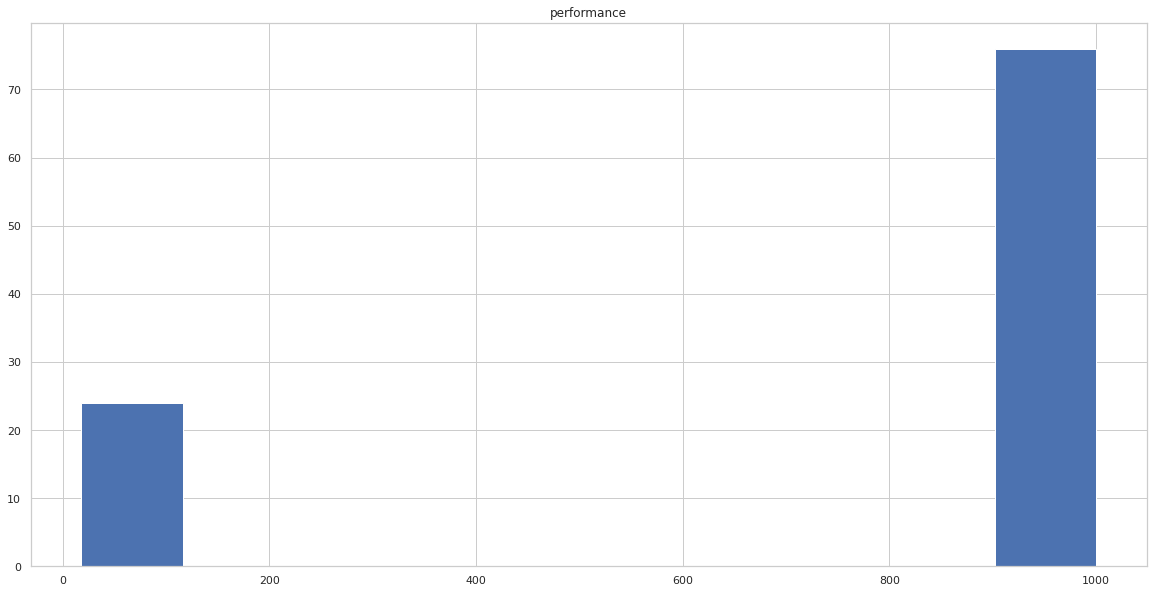

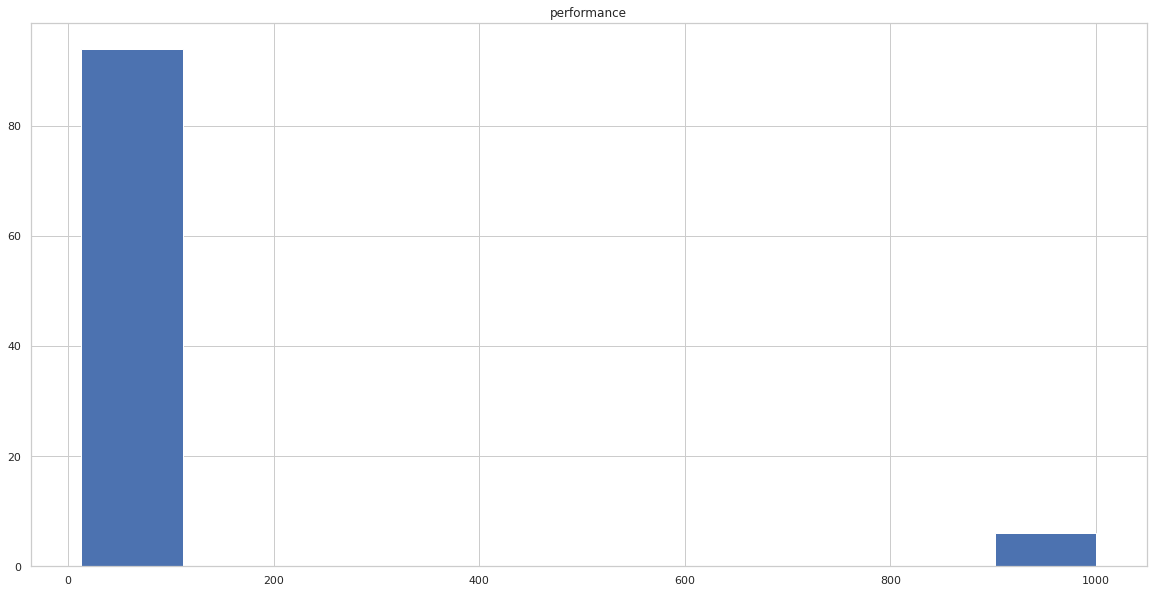

In [10]:
generate_hist(good, 'performance')
generate_hist(bad, 'performance')